<a href="https://colab.research.google.com/github/egrushing/pacer-api/blob/master/Docket_Alarm_API_Search.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

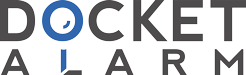
# Docket Alarm API Jupyter Notebook

*September 2020*

This short notebook just logs into the Docket Alarm API, runs a search, and then prints out results. If the results contain documents, then it will print out the OCRed document text as well.

## Set User API Login Credentials

In [4]:
import getpass
# Set your username here.
username = "emily.rushing@haynesboone.com"
# Get the password for the username.
password = 'haynes1'

## Set the Query that you want to search

Query [documentation is available here](https://www.docketalarm.com/posts/2014/6/23/Terms-and-Connectors-Searching-With-Docket-Alarm/).

In [1]:
query = 'is:docket_num:"2019-65517")'

## Login, Do a Search



In [5]:
import urllib
import urllib.request
import urllib.parse
import json
import pprint

endpoint = "https://www.docketalarm.com/api/v1/"

def get_login_token(username, password):
  '''Login to the API with the username and password'''
  # Encode our parameters
  data = urllib.parse.urlencode({
      'username' : username,
      'password' : password
  })
  # Convert the data string into bytes. The Request object needs bytes.
  data = data.encode('utf8')
  # Put together the request.
  login_resp = urllib.request.Request(endpoint + "login/", data=data)

  # Make the request
  data_resp = urllib.request.urlopen(login_resp)
  # Read the request
  data_resp = data_resp.read()
  # Change from binary object to string object.
  data_resp = data_resp.decode('utf8')
  # Decode string via json.
  data_resp = json.loads(data_resp)
  # Make sure there were no error returned by the API.
  if data_resp.get('success') == False:
    raise Exception("Search Error: %s"%(data_resp.get('error')))
  login_token = data_resp['login_token']
  return login_token

def do_search(query, login_token, order='-date_filed', limit=5, offset=0):
  '''Given a query and login token, do a search.'''
  if order not in ["", "-date_filed", "date_filed", "random", 
                   "date_last_filing", "-date_last_filing"]:
    raise Exception("Bad Order Specified: %s"%order)
  if limit < 0 or limit > 50:
    raise Exception("Limit must be >0 and <=50.")
  data = urllib.parse.urlencode({
      'q' : query,
      'o' : order,
      'limit' : limit,
      'offset' : offset,
      'login_token' : login_token
  })
  # Put together the request.
  search_req = urllib.request.Request(endpoint + "search/?" + data)

  # Make the request
  data_resp = urllib.request.urlopen(search_req)
  # Read the request
  data_resp = data_resp.read()
  # change from binary object to string object
  data_resp = data_resp.decode('utf8')
  # decode string via json
  data_resp = json.loads(data_resp)
  # Make sure there were no error returned by the API.
  if data_resp.get('success') == False:
    raise Exception("Search Error: %s"%(data_resp.get('error')))
  return data_resp


# Login to the API
login_token = get_login_token(username = username, password = password)
# Do the Search
search_results = do_search(query, login_token)


Exception: ignored